In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'affectnet-training-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2812806%2F4860972%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240819%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240819T145216Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79f5cf340b306f1e4bbf04a82f8e68d72cad695f3bbd7a1999732f1e952365828914788007e136c0ce0bd7f381d6944059f93a7a151a00b19b5ab06d6c91dacfe1e20cf4020177d8c50dd9d41f99c332bcfb09846309bba39cb58c54a4d08fe7e857748185f66c8f2cb96196c2bd53583360b66771b43eca855aa39492dfbbecbd253617f97c3c461fbf9083a2fc20b42615d21f69848b64ed3800de943510686dc0b03a5d5c1c50bf6aa9f3c7925c6d613d0c5153edbf57d87c20b84eb1f26d1b5162b77c73adec3b6f925963a63b73ae8c96123b26b89582f751c02d9e585032df20e268bd9a7814ebc48cf06d78c6542a72c2c3153b7c585c830866a06e22'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 329755345 bytes downloaded
Downloaded and uncompressed: affectnet-training-data
Data source import complete.


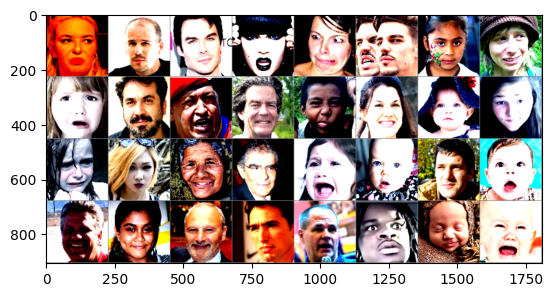

Experimenting with SGD and learning rate 0.001


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]
Epoch 1/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 1/10, Loss: 1.9034, Train Accuracy: 0.2590


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.09batch/s]


Validation Loss: 1.5512, Validation Accuracy: 0.3987


Epoch 2/10: 100%|██████████| 727/727 [01:55<00:00,  6.28batch/s]


Epoch 2/10, Loss: 1.6842, Train Accuracy: 0.3600


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.67batch/s]


Validation Loss: 1.3889, Validation Accuracy: 0.4617


Epoch 3/10: 100%|██████████| 727/727 [01:55<00:00,  6.28batch/s]


Epoch 3/10, Loss: 1.6071, Train Accuracy: 0.4040


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.31batch/s]


Validation Loss: 1.2910, Validation Accuracy: 0.5161


Epoch 4/10: 100%|██████████| 727/727 [01:55<00:00,  6.27batch/s]


Epoch 4/10, Loss: 1.5601, Train Accuracy: 0.4309


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.71batch/s]


Validation Loss: 1.2349, Validation Accuracy: 0.5292


Epoch 5/10: 100%|██████████| 727/727 [01:55<00:00,  6.30batch/s]


Epoch 5/10, Loss: 1.5250, Train Accuracy: 0.4473


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.33batch/s]


Validation Loss: 1.1940, Validation Accuracy: 0.5541


Epoch 6/10: 100%|██████████| 727/727 [01:55<00:00,  6.29batch/s]


Epoch 6/10, Loss: 1.4988, Train Accuracy: 0.4635


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.82batch/s]


Validation Loss: 1.1487, Validation Accuracy: 0.5724


Epoch 7/10: 100%|██████████| 727/727 [01:55<00:00,  6.31batch/s]


Epoch 7/10, Loss: 1.4656, Train Accuracy: 0.4759


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.22batch/s]


Validation Loss: 1.1141, Validation Accuracy: 0.5863


Epoch 8/10: 100%|██████████| 727/727 [01:55<00:00,  6.30batch/s]


Epoch 8/10, Loss: 1.4607, Train Accuracy: 0.4821


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.87batch/s]


Validation Loss: 1.0945, Validation Accuracy: 0.5941


Epoch 9/10: 100%|██████████| 727/727 [01:55<00:00,  6.32batch/s]


Epoch 9/10, Loss: 1.4490, Train Accuracy: 0.4859


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.32batch/s]


Validation Loss: 1.0731, Validation Accuracy: 0.6096


Epoch 10/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 10/10, Loss: 1.4250, Train Accuracy: 0.5014


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.81batch/s]


Validation Loss: 1.0504, Validation Accuracy: 0.6120
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.44      0.59      0.50       641
    contempt       0.52      0.68      0.59       572
     disgust       0.46      0.15      0.23       511
        fear       0.48      0.40      0.44       645
       happy       0.93      0.84      0.88      1022
     neutral       0.79      0.91      0.84      1005
         sad       0.45      0.34      0.39       609
    surprise       0.49      0.59      0.54       804

    accuracy                           0.61      5809
   macro avg       0.57      0.56      0.55      5809
weighted avg       0.61      0.61      0.60      5809

Experimenting with Adam and learning rate 0.001


Epoch 1/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 1/10, Loss: 1.5057, Train Accuracy: 0.4570


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.76batch/s]


Validation Loss: 0.9594, Validation Accuracy: 0.6485


Epoch 2/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 2/10, Loss: 1.3259, Train Accuracy: 0.5437


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.36batch/s]


Validation Loss: 0.8901, Validation Accuracy: 0.6795


Epoch 3/10: 100%|██████████| 727/727 [01:56<00:00,  6.25batch/s]


Epoch 3/10, Loss: 1.2391, Train Accuracy: 0.5826


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.82batch/s]


Validation Loss: 0.8375, Validation Accuracy: 0.6996


Epoch 4/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 4/10, Loss: 1.1881, Train Accuracy: 0.6056


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.21batch/s]


Validation Loss: 0.8508, Validation Accuracy: 0.6968


Epoch 5/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 5/10, Loss: 1.1326, Train Accuracy: 0.6280


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.85batch/s]


Validation Loss: 0.8707, Validation Accuracy: 0.6865


Epoch 6/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 6/10, Loss: 1.0977, Train Accuracy: 0.6456


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.12batch/s]


Validation Loss: 0.8551, Validation Accuracy: 0.6998


Epoch 7/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 7/10, Loss: 1.0412, Train Accuracy: 0.6729


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.27batch/s]


Validation Loss: 0.8929, Validation Accuracy: 0.6889


Epoch 8/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 8/10, Loss: 1.0152, Train Accuracy: 0.6818


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.57batch/s]


Validation Loss: 0.9293, Validation Accuracy: 0.6845


Epoch 9/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 9/10, Loss: 0.9821, Train Accuracy: 0.6986


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.22batch/s]


Validation Loss: 0.9339, Validation Accuracy: 0.6834


Epoch 10/10: 100%|██████████| 727/727 [01:58<00:00,  6.15batch/s]


Epoch 10/10, Loss: 0.9736, Train Accuracy: 0.6992


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.79batch/s]


Validation Loss: 0.9324, Validation Accuracy: 0.6920
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.50      0.63      0.56       641
    contempt       0.70      0.66      0.68       572
     disgust       0.66      0.44      0.53       511
        fear       0.58      0.48      0.52       645
       happy       0.96      0.88      0.92      1022
     neutral       0.86      0.91      0.88      1005
         sad       0.60      0.51      0.55       609
    surprise       0.54      0.72      0.62       804

    accuracy                           0.69      5809
   macro avg       0.68      0.65      0.66      5809
weighted avg       0.70      0.69      0.69      5809

Experimenting with AdamW and learning rate 0.001


Epoch 1/10: 100%|██████████| 727/727 [01:58<00:00,  6.15batch/s]


Epoch 1/10, Loss: 1.5061, Train Accuracy: 0.4588


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.75batch/s]


Validation Loss: 0.9677, Validation Accuracy: 0.6419


Epoch 2/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 2/10, Loss: 1.3293, Train Accuracy: 0.5444


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.63batch/s]


Validation Loss: 0.8867, Validation Accuracy: 0.6791


Epoch 3/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 3/10, Loss: 1.2521, Train Accuracy: 0.5775


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.17batch/s]


Validation Loss: 0.8690, Validation Accuracy: 0.6929


Epoch 4/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 4/10, Loss: 1.1938, Train Accuracy: 0.6031


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.94batch/s]


Validation Loss: 0.8673, Validation Accuracy: 0.6922


Epoch 5/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 5/10, Loss: 1.1338, Train Accuracy: 0.6260


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.28batch/s]


Validation Loss: 0.8735, Validation Accuracy: 0.6925


Epoch 6/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 6/10, Loss: 1.1020, Train Accuracy: 0.6472


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.20batch/s]


Validation Loss: 0.8586, Validation Accuracy: 0.6912


Epoch 7/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 7/10, Loss: 1.0492, Train Accuracy: 0.6654


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.01batch/s]


Validation Loss: 0.9033, Validation Accuracy: 0.6802


Epoch 8/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 8/10, Loss: 1.0284, Train Accuracy: 0.6769


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.59batch/s]


Validation Loss: 0.9419, Validation Accuracy: 0.6872


Epoch 9/10: 100%|██████████| 727/727 [01:56<00:00,  6.24batch/s]


Epoch 9/10, Loss: 0.9814, Train Accuracy: 0.6957


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.08batch/s]


Validation Loss: 0.9164, Validation Accuracy: 0.6884


Epoch 10/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 10/10, Loss: 0.9250, Train Accuracy: 0.7210


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.53batch/s]


Validation Loss: 0.9068, Validation Accuracy: 0.6938
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.51      0.62      0.56       641
    contempt       0.70      0.62      0.66       572
     disgust       0.60      0.46      0.52       511
        fear       0.53      0.57      0.55       645
       happy       0.94      0.90      0.92      1022
     neutral       0.88      0.90      0.89      1005
         sad       0.60      0.53      0.57       609
    surprise       0.58      0.65      0.61       804

    accuracy                           0.69      5809
   macro avg       0.67      0.66      0.66      5809
weighted avg       0.70      0.69      0.69      5809

Experimenting with RMSprop and learning rate 0.001


Epoch 1/10: 100%|██████████| 727/727 [01:56<00:00,  6.25batch/s]


Epoch 1/10, Loss: 1.5570, Train Accuracy: 0.4347


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.56batch/s]


Validation Loss: 1.1427, Validation Accuracy: 0.5734


Epoch 2/10: 100%|██████████| 727/727 [01:55<00:00,  6.29batch/s]


Epoch 2/10, Loss: 1.4110, Train Accuracy: 0.5013


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.63batch/s]


Validation Loss: 1.0125, Validation Accuracy: 0.6266


Epoch 3/10: 100%|██████████| 727/727 [01:55<00:00,  6.27batch/s]


Epoch 3/10, Loss: 1.3684, Train Accuracy: 0.5224


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.47batch/s]


Validation Loss: 0.9819, Validation Accuracy: 0.6416


Epoch 4/10: 100%|██████████| 727/727 [01:55<00:00,  6.29batch/s]


Epoch 4/10, Loss: 1.3154, Train Accuracy: 0.5433


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.51batch/s]


Validation Loss: 0.9258, Validation Accuracy: 0.6564


Epoch 5/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 5/10, Loss: 1.2495, Train Accuracy: 0.5694


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.34batch/s]


Validation Loss: 0.9309, Validation Accuracy: 0.6736


Epoch 6/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 6/10, Loss: 1.1950, Train Accuracy: 0.5937


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.01batch/s]


Validation Loss: 0.9294, Validation Accuracy: 0.6674


Epoch 7/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 7/10, Loss: 1.1517, Train Accuracy: 0.6149


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.28batch/s]


Validation Loss: 0.9052, Validation Accuracy: 0.6824


Epoch 8/10: 100%|██████████| 727/727 [02:00<00:00,  6.01batch/s]


Epoch 8/10, Loss: 1.0866, Train Accuracy: 0.6442


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.21batch/s]


Validation Loss: 0.9577, Validation Accuracy: 0.6641


Epoch 9/10: 100%|██████████| 727/727 [01:58<00:00,  6.14batch/s]


Epoch 9/10, Loss: 1.0338, Train Accuracy: 0.6626


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.24batch/s]


Validation Loss: 0.9485, Validation Accuracy: 0.6707


Epoch 10/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 10/10, Loss: 0.9853, Train Accuracy: 0.6859


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.18batch/s]


Validation Loss: 0.9715, Validation Accuracy: 0.6702
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.59      0.40      0.48       641
    contempt       0.53      0.76      0.63       572
     disgust       0.47      0.56      0.51       511
        fear       0.50      0.53      0.52       645
       happy       0.94      0.93      0.93      1022
     neutral       0.88      0.90      0.89      1005
         sad       0.63      0.38      0.47       609
    surprise       0.57      0.59      0.58       804

    accuracy                           0.67      5809
   macro avg       0.64      0.63      0.63      5809
weighted avg       0.68      0.67      0.67      5809

Plotting for optimizer=SGD, lr=0.001


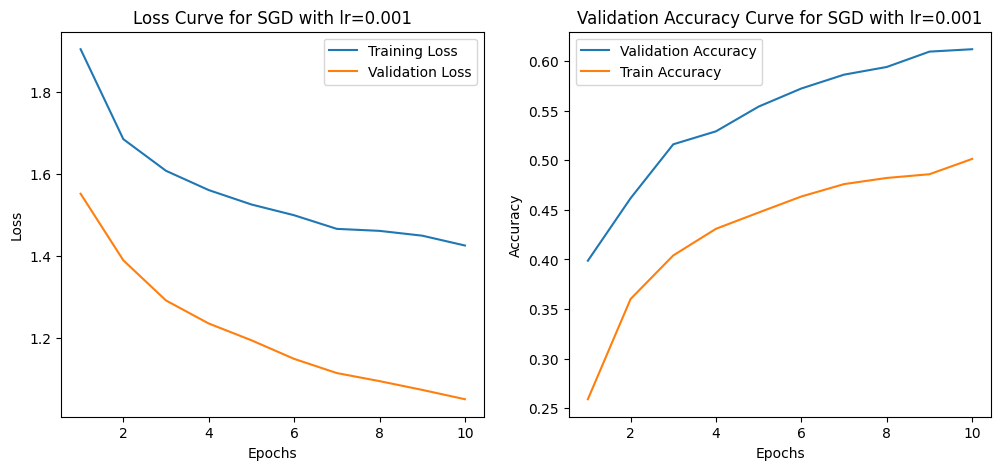

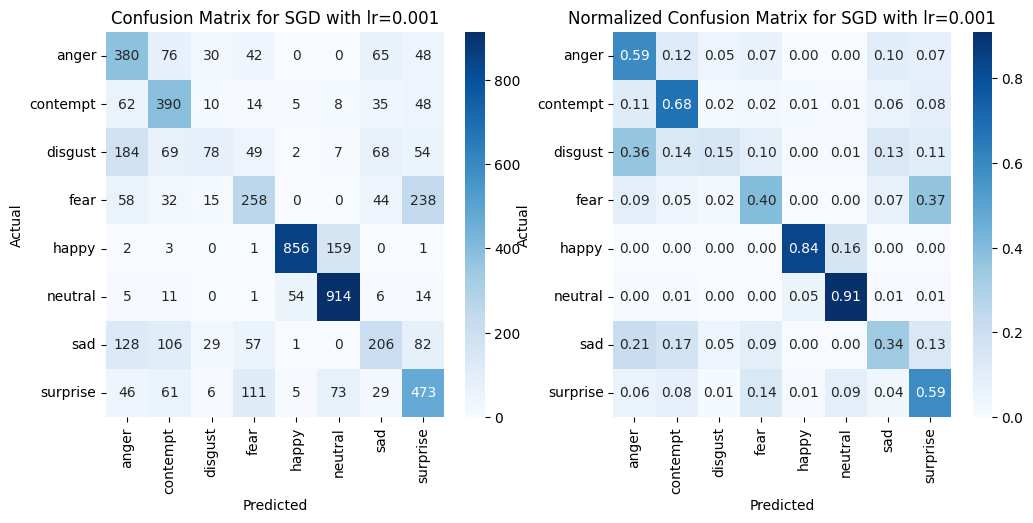

Plotting for optimizer=Adam, lr=0.001


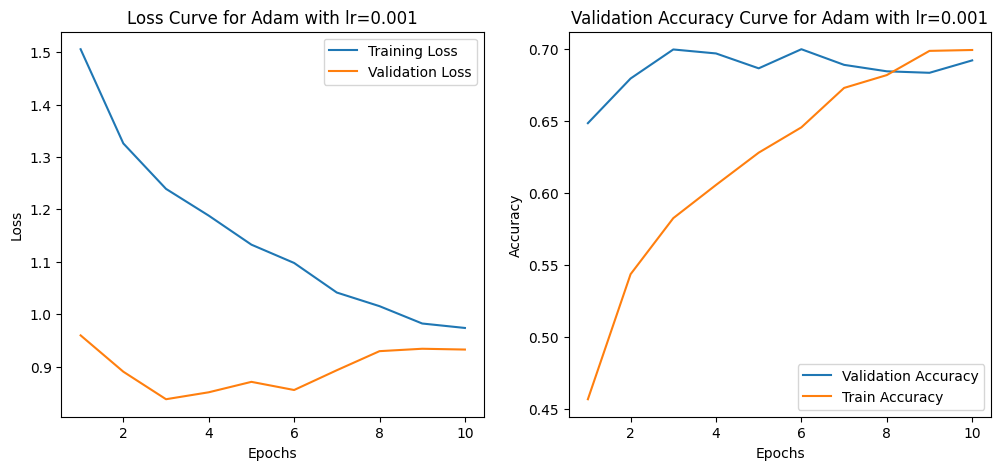

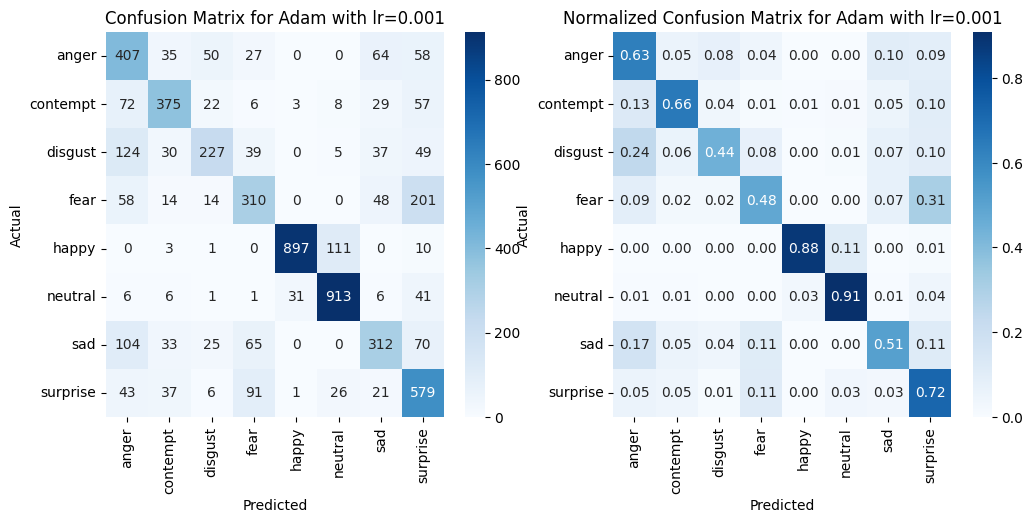

Plotting for optimizer=AdamW, lr=0.001


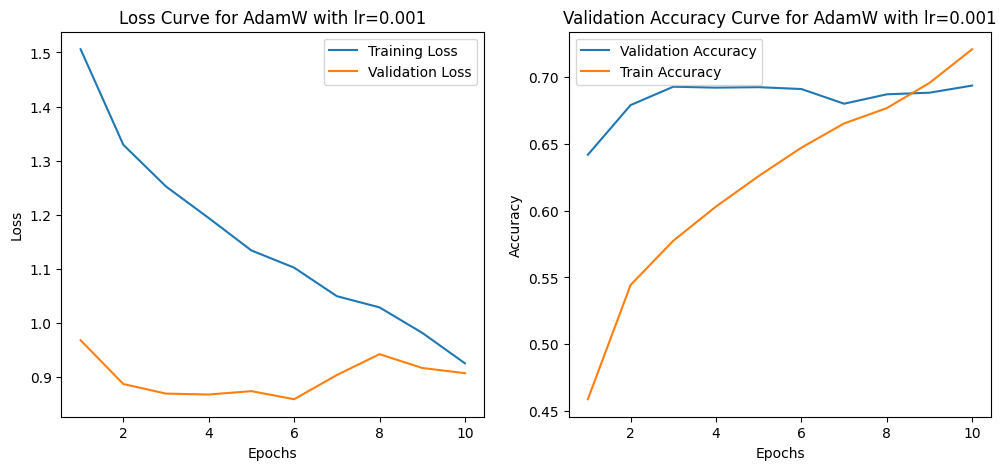

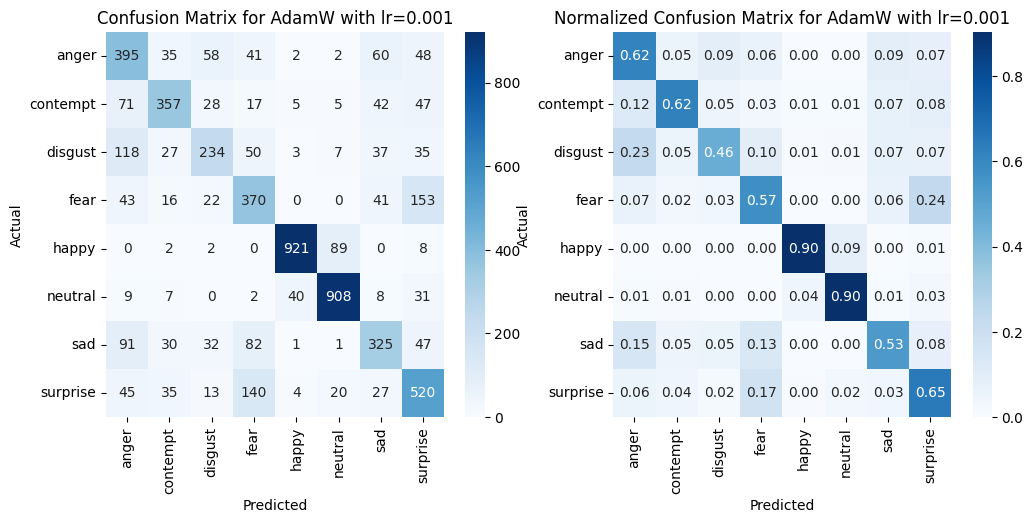

Plotting for optimizer=RMSprop, lr=0.001


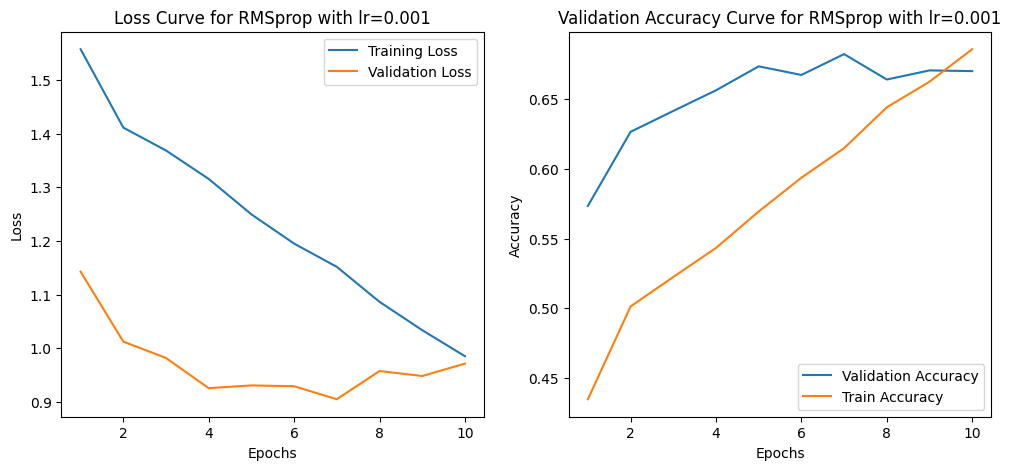

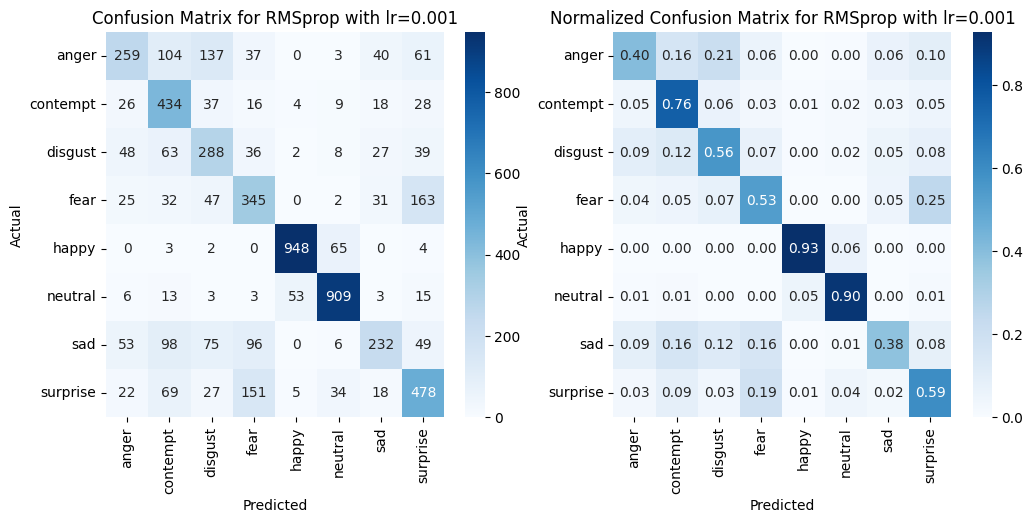

In [3]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torchvision.utils import make_grid
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# To Load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Defining Dynamic Augmentation Class
class DynamicAugmenter:
    def __init__(self):
        self.transformations = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.5, contrast=0.5),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomAffine(degrees=20, translate=(0.1, 0.1)),
            transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
        ]
        self.current_transforms = []

    def update_augmentation(self, val_accuracy):
        if val_accuracy < 0.6:
            self.current_transforms = random.sample(self.transformations, k=5)
        else:
            self.current_transforms = random.sample(self.transformations, k=3)

    def __call__(self, img):
        transform = transforms.Compose(self.current_transforms + [transforms.ToTensor()])
        return transform(img)

# Applying Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading dataset
base_dir = '/kaggle/input/affectnet-training-data'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# To display some images
data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5  # Unnormalized form
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(make_grid(images))

# Experimenting with different optimizers and learning rates
optimizers = ['SGD', 'Adam', 'AdamW', 'RMSprop']
learning_rates = [0.001]#, 0.001, 0.01]
num_epochs = 10

all_results = {}

for lr in learning_rates:
    for optimizer_class_name in optimizers:
        print(f'Experimenting with {optimizer_class_name} and learning rate {lr}')

        # Defining the Model
        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        model.fc = nn.Linear(model.fc.in_features, 8)
        model.to(device)

        # Loss
        criterion = nn.CrossEntropyLoss()

        # Optimizer
        if optimizer_class_name == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
        elif optimizer_class_name == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)
        elif optimizer_class_name == 'AdamW':
            optimizer = optim.AdamW(model.parameters(), lr=lr)
        elif optimizer_class_name == 'RMSprop':
            optimizer = optim.RMSprop(model.parameters(), lr=lr)

        # Scheduler
        scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr, steps_per_epoch=len(train_loader), epochs=num_epochs)

        # Mixup functions
        def mixup_data(x, y, alpha=1.0):
            if alpha > 0:
                lam = np.random.beta(alpha, alpha)
            else:
                lam = 1
            batch_size = x.size()[0]
            index = torch.randperm(batch_size).to(device)
            mixed_x = lam * x + (1 - lam) * x[index, :]
            y_a, y_b = y, y[index]
            return mixed_x, y_a, y_b, lam

        def mixup_criterion(criterion, pred, y_a, y_b, lam):
            return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

        # Initializing lists to store loss and accuracy values
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        augmenter = DynamicAugmenter()

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
                images, labels = images.to(device), labels.to(device)

                # Applying Mixup
                images, labels_a, labels_b, lam = mixup_data(images, labels, alpha=1.0)

                optimizer.zero_grad()

                outputs = model(images)
                loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)

                loss.backward()
                optimizer.step()

                running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (lam * (predicted == labels_a).sum().item() + (1 - lam) * (predicted == labels_b).sum().item())

            epoch_loss = running_loss / len(train_loader.dataset)
            train_accuracy = correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(train_accuracy)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

            # Evaluating the Validation set
            model.eval()
            val_running_loss = 0.0
            correct = 0
            total = 0

            with torch.no_grad():
                for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    val_running_loss += loss.item() * images.size(0)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            val_loss = val_running_loss / len(val_loader.dataset)
            val_accuracy = correct / total
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

            # Updating dynamic augmenter based on validation accuracy
            augmenter.update_augmentation(val_accuracy)

            # Adjusting learning rate with scheduler
            scheduler.step()

        # Saving the model
        model_path = f'resnet18_affectnet_{optimizer_class_name}_lr{lr}.pth'
        torch.save(model.state_dict(), model_path)

        # Evaluating the model on validation set
        model.eval()
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        all_labels = np.array(all_labels)
        all_preds = np.array(all_preds)

        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=dataset.classes)
        print("Classification Report for Validation Set:")
        print(report)

        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Calculating test/val loss and accuracy
        test_loss = val_losses[-1]
        test_accuracy = val_accuracies[-1]

        # Storing the results
        all_results[(lr, optimizer_class_name)] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'y_true': all_labels,
            'y_pred': all_preds
        }

# Plotting the results
for key, result in all_results.items():
    lr, opt = key
    print(f'Plotting for optimizer={opt}, lr={lr}')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), result['train_losses'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), result['val_losses'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve for {opt} with lr={lr}')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), result['val_accuracies'], label='Validation Accuracy')
    plt.plot(range(1, num_epochs + 1), result['train_accuracies'], label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Validation Accuracy Curve for {opt} with lr={lr}')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(result['y_true'], result['y_pred'])

    # Plotting non-normalized confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plotting normalized confusion matrix
    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Normalized Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

Plotting for optimizer=SGD, lr=0.001


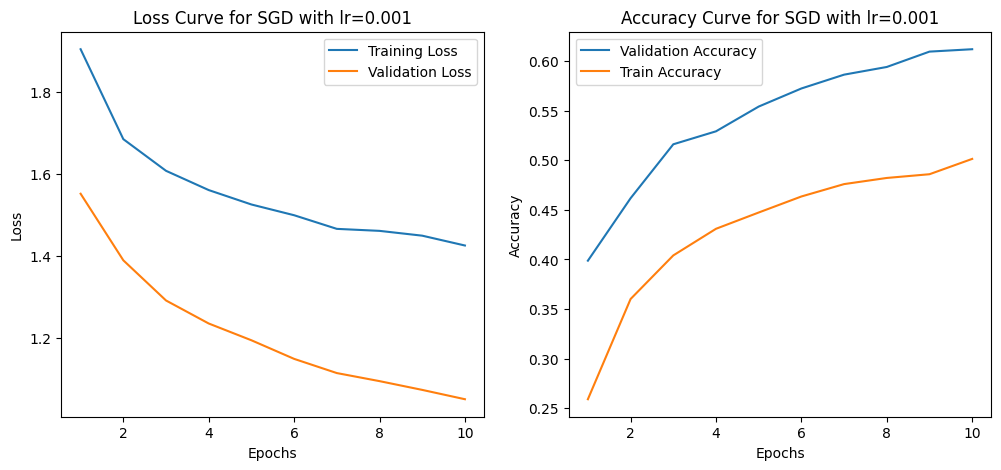

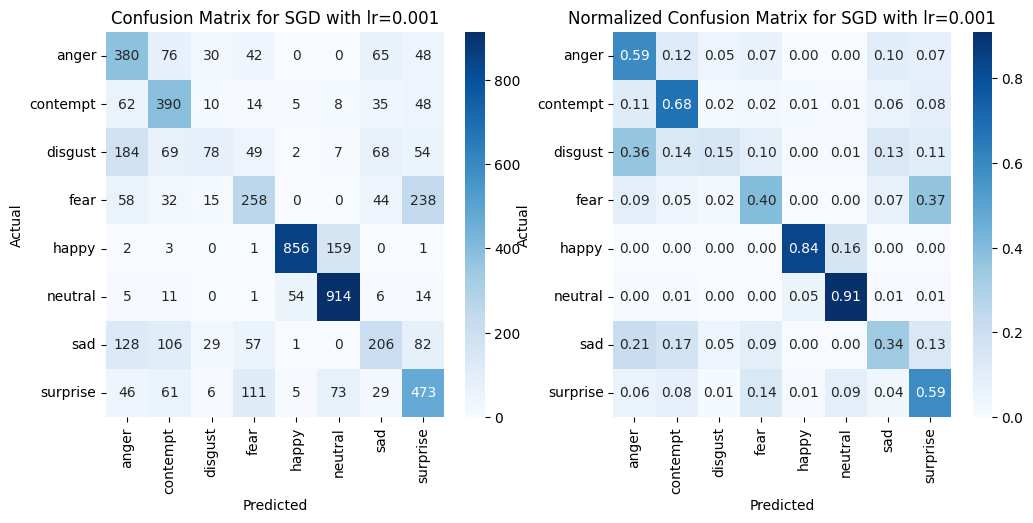

Plotting for optimizer=Adam, lr=0.001


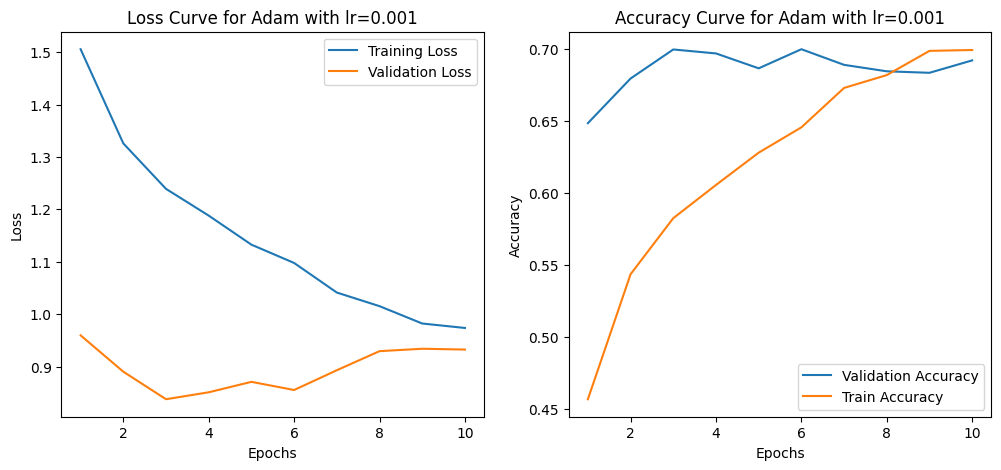

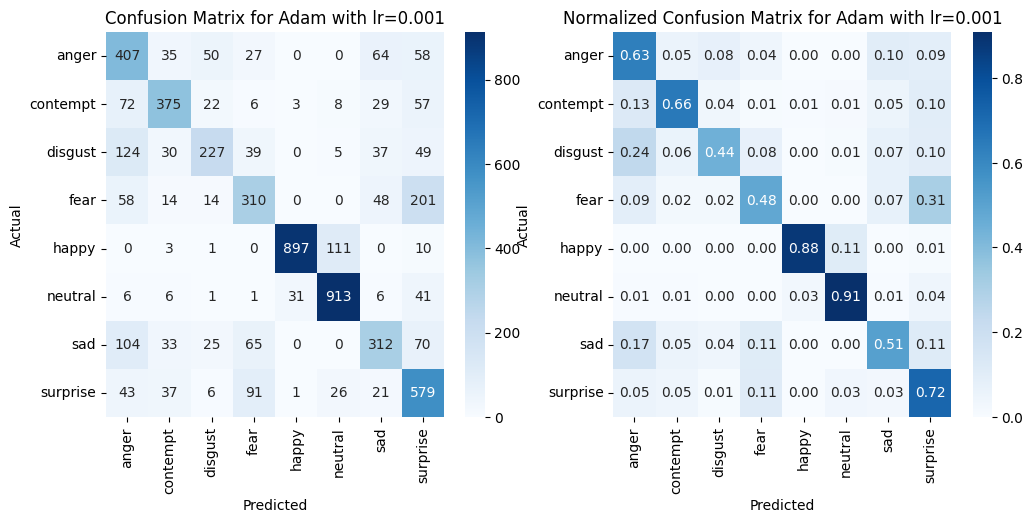

Plotting for optimizer=AdamW, lr=0.001


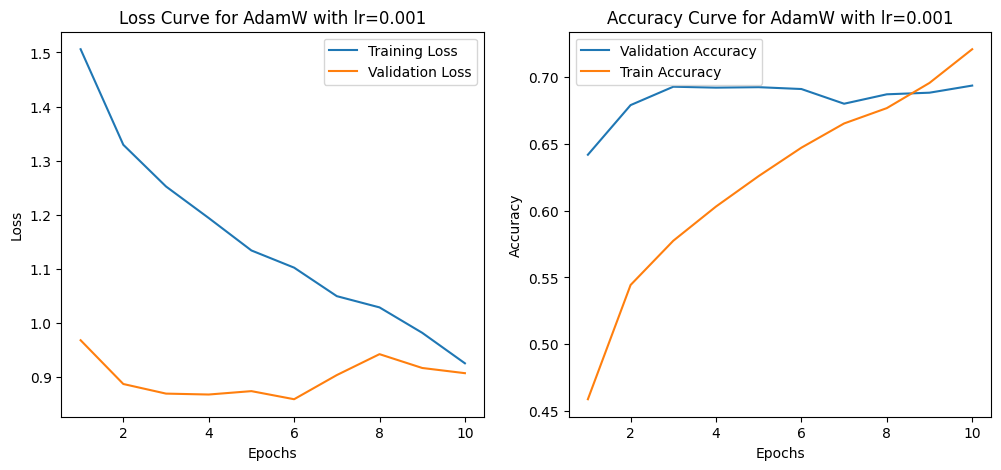

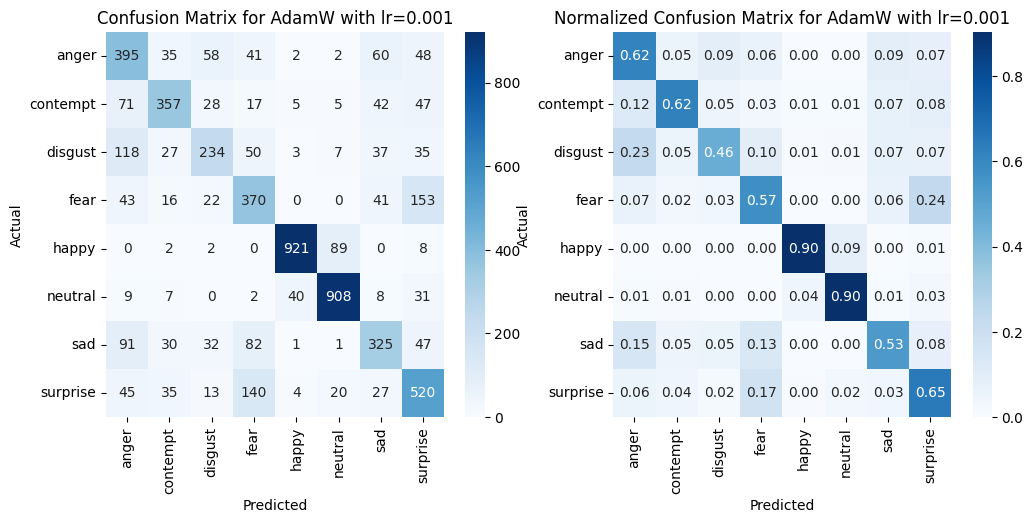

Plotting for optimizer=RMSprop, lr=0.001


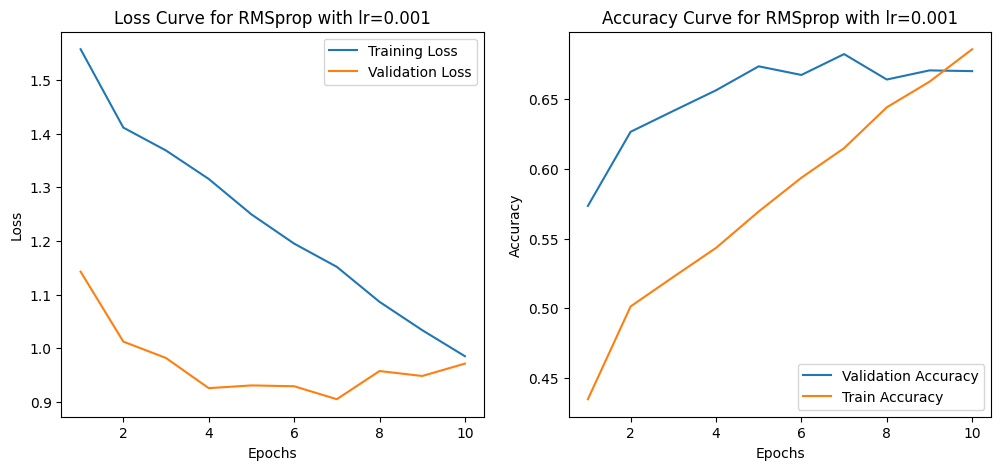

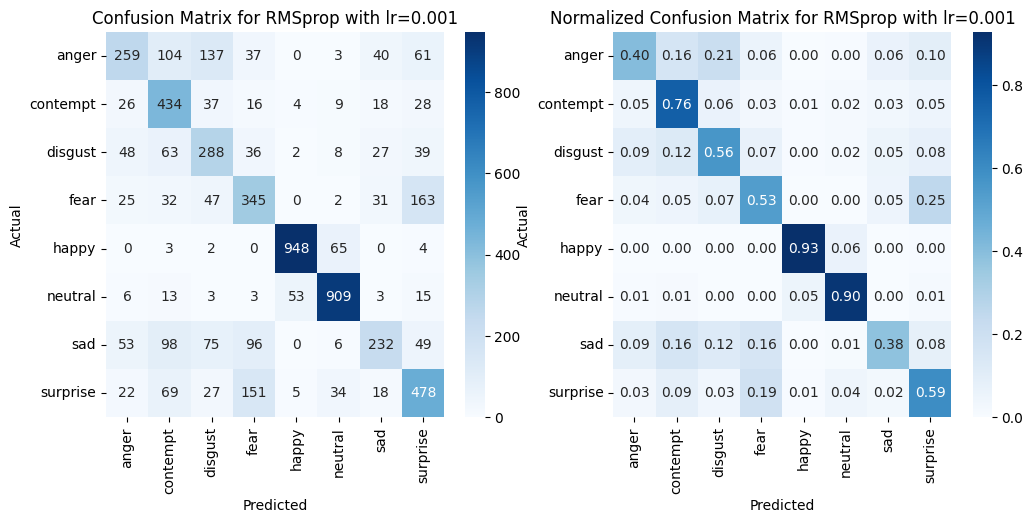

In [4]:
# Plot results
for key, result in all_results.items():
    lr, opt = key
    print(f'Plotting for optimizer={opt}, lr={lr}')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), result['train_losses'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), result['val_losses'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve for {opt} with lr={lr}')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), result['val_accuracies'], label='Validation Accuracy')
    plt.plot(range(1, num_epochs + 1), result['train_accuracies'], label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy Curve for {opt} with lr={lr}')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(result['y_true'], result['y_pred'])

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot normalized confusion matrix
    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Normalized Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

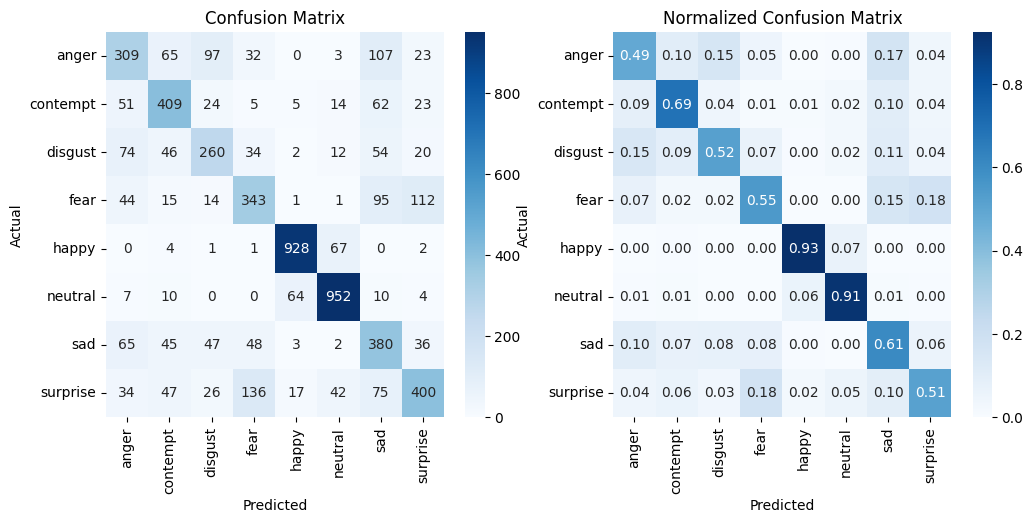

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm,cmap='Blues', fmt='d',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plot Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized,cmap='Blues', fmt='.2f',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
